Google Colab note:
- Check in which folder you are in

In [1]:
import os
print(os.getcwd())

/Users/samskanderi/Downloads


Upload the data file in that folder
- It will be deleted after your session

In [2]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
print(print(tf.__version__))

Instructions for updating:
non-resource variables are not supported in the long term
2.14.0
None


#Read the data
- From CSV to Pandas data frame

In [11]:
x2d = pd.read_csv('x2d.csv', header=None)

In [12]:
x2d.shape

(100, 4)

In [13]:
x2d.head()

,0,1,2,3
0,0,5.1,3.5,1
1,1,4.9,3.0,1
2,2,4.7,3.2,1
3,3,4.6,3.1,1
4,4,5.0,3.6,1


#Features
- Column 1 : id
- Columns 2 - 5: features/attributes
- Column 6: label

We will to do a binary classification, so we will keep the first 100 rows of data

Iris-setosa species is linearly separable from the other two, but the other two are not linearly separable from each other.To keep the species blance Iris-setosa and Iris-versicolor are choosen

In [ ]:
# iris = iris[:100]

#Covert the string lables to numerals

In [8]:
# iris.Species = iris.Species.replace(to_replace=['Iris-setosa', 'Iris-versicolor'], value=[0, 1])

#Visualize two class examples in 2D space
- We simply select first two features

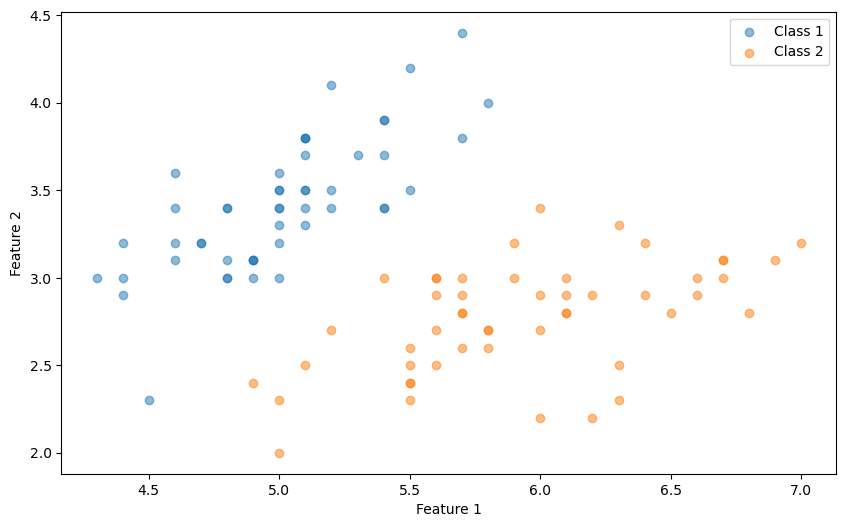

In [14]:
class_1 = x2d[x2d[3] == 1]
class_2 = x2d[x2d[3] != 1]

plt.figure(figsize=(10, 6))

# Scatter plot for each class
plt.scatter(class_1[1], class_1[2], label='Class 1', alpha=0.5)
plt.scatter(class_2[1], class_2[2], label='Class 2', alpha=0.5)

# Labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')

plt.show()

#Define X and y

In [17]:
X = x2d.iloc[:, 1:-1]  # All rows, all columns except the last one as features
y = x2d.iloc[:, -1] 
print("X shape: ", X.shape, "y shape: ", y.shape)
(m,n) = X.shape
print("Number of total examples: ", m, " Number of features: ", n)


X shape:  (100, 2) y shape:  (100,)
Number of total examples:  100  Number of features:  2


#Split data
- Train:test (70%:30%)
- Initializing the random seeds to regenerate the outputs

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print (X_train.shape)
print (X_test.shape)

(70, 2)
(30, 2)


#Normalize
- Z normalization: feature_value-mean(feature)/standard_deviation(feature)
- Min/max normalization: feature_value - min(feature)/max(feature)-min(feature)


In [30]:
def minmax_normalization(feat_val):
  min_val = np.min(feat_val, axis=0)
  max_val = np.max(feat_val, axis=0)
  return (feat_val - min_val) / (max_val - min_val)

In [31]:
# z normalize
X_train = minmax_normalization(X_train)
X_test = minmax_normalization(X_test)

#Weight and bias initialization

In [32]:
W = tf.Variable(tf.random.normal(shape=[n, 1]))
b = tf.Variable(tf.random.normal(shape=[1, 1]))
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

2024-02-27 20:13:42.358636: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:382] MLIR V1 optimization pass is not enabled


#Defining the placeholders

In [33]:
data = tf.placeholder(dtype=tf.float32, shape=[None, n])
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])

#Model definition

In [34]:
mod = tf.matmul(data, W) + b

#Define loss function

In [35]:
#first doing a sigmoid on the model result and then using the cross-entropy loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=target))

#Initialize hyperparameters
- Batch size
- Learning rate
- Number of iterations

In [39]:
learning_rate = 0.01
batch_size = 20
iter_num = 500

#Define the optimizer

In [40]:
opt = tf.train.GradientDescentOptimizer(learning_rate)

#Define the goal
- minimize the defined loss

In [41]:
goal = opt.minimize(loss)

#Define accuracy

In [42]:
# The default threshold of sigmoid is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)
# End of the definition of the model framework

# Initialize variables that analyze learning progress

In [43]:
loss_trace = []
train_acc = []
test_acc = []

#Training

In [46]:
for epoch in range(iter_num):
  # Generate random batch index
  batch_index = np.random.choice(len(X_train), size=batch_size)
  batch_X_train = X_train.iloc[batch_index]
  batch_y_train = np.matrix(y_train.iloc[batch_index]).T
  sess.run(goal, feed_dict={data: batch_X_train, target: batch_y_train})
  temp_loss = sess.run(loss, feed_dict={data: batch_X_train, target: batch_y_train})
  temp_train_acc = sess.run(accuracy, feed_dict={data: X_train, target: np.matrix(y_train).T})
  temp_test_acc = sess.run(accuracy, feed_dict={data: X_test, target: np.matrix(y_test).T})
  loss_trace.append(temp_loss)
  train_acc.append(temp_train_acc)
  test_acc.append(temp_test_acc)
  if (epoch + 1) % 10 == 0:
    print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch + 1, temp_loss, temp_train_acc, temp_test_acc))


epoch:   10 loss: 0.558775 train_acc: 0.542857 test_acc: 0.466667
epoch:   20 loss: 0.521881 train_acc: 0.542857 test_acc: 0.466667
epoch:   30 loss: 0.620471 train_acc: 0.557143 test_acc: 0.466667
epoch:   40 loss: 0.530729 train_acc: 0.571429 test_acc: 0.466667
epoch:   50 loss: 0.612786 train_acc: 0.571429 test_acc: 0.500000
epoch:   60 loss: 0.589129 train_acc: 0.585714 test_acc: 0.500000
epoch:   70 loss: 0.606400 train_acc: 0.585714 test_acc: 0.500000
epoch:   80 loss: 0.557958 train_acc: 0.600000 test_acc: 0.500000
epoch:   90 loss: 0.514694 train_acc: 0.600000 test_acc: 0.500000
epoch:  100 loss: 0.566693 train_acc: 0.614286 test_acc: 0.500000
epoch:  110 loss: 0.544713 train_acc: 0.614286 test_acc: 0.500000
epoch:  120 loss: 0.554295 train_acc: 0.642857 test_acc: 0.500000
epoch:  130 loss: 0.550794 train_acc: 0.671429 test_acc: 0.500000
epoch:  140 loss: 0.470743 train_acc: 0.671429 test_acc: 0.500000
epoch:  150 loss: 0.553409 train_acc: 0.671429 test_acc: 0.500000
epoch:  16

#Visualization of the loss function

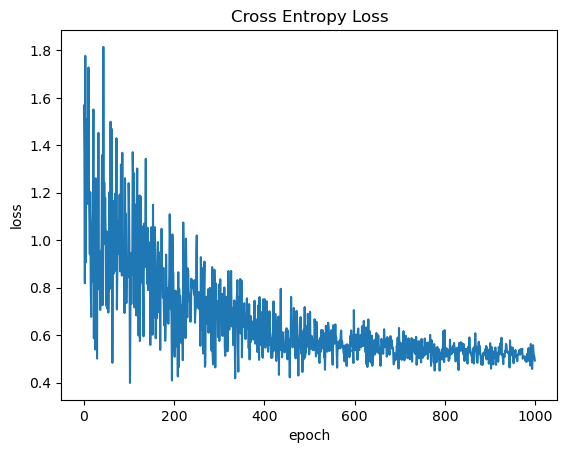

In [47]:

plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

#Train and test accuracy visualization

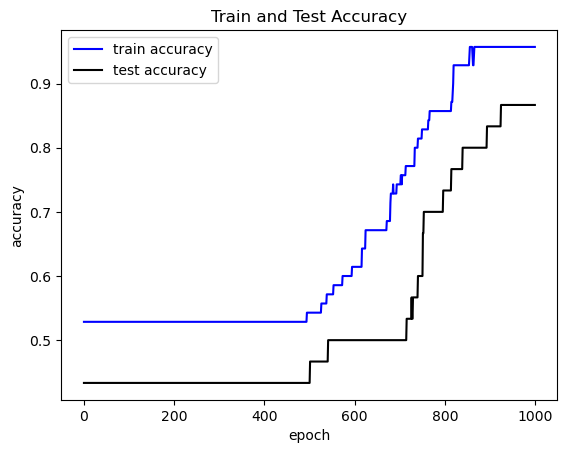

In [48]:

plt.plot(train_acc, 'b-', label='train accuracy')
plt.plot(test_acc, 'k-', label='test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train and Test Accuracy')
plt.legend(loc='best')
plt.show()